<a href="https://colab.research.google.com/github/anujushir/My-Projects-ML-DL-and-NLP-/blob/main/Monthly_Problem_Analysis_and_Root_Cause_Identification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from collections import Counter

# Load the dataset
df = pd.read_excel('/content/Incident Data Jan to Dec.xlsx')

# Clean text function
def clean_text(text):
    text = str(text).lower()
    text = ''.join([char for char in text if char.isalnum() or char.isspace()])
    return text

# Apply cleaning to the specified columns
df['Short_Description'] = df['Short_Description'].apply(clean_text)
df['Resolution_note'] = df['Resolution_note'].apply(clean_text)

# Vectorize text using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(df['Short_Description'])

# Cluster similar problems
n_clusters = 10  # Adjust based on your data
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Problem Cluster'] = kmeans.fit_predict(X)

# Map root causes for each cluster
problem_root_mapping = {}
for cluster in range(n_clusters):
    cluster_data = df[df['Problem Cluster'] == cluster]
    problems = ' '.join(cluster_data['Short_Description'])
    root_causes = ' '.join(cluster_data['Resolution_note'])

    # Identify common words/phrases in problems and root causes
    common_problem_terms = Counter(problems.split()).most_common(5)
    common_root_causes = Counter(root_causes.split()).most_common(5)

    problem_root_mapping[f'Cluster {cluster}'] = {
        'Common Problems': [term[0] for term in common_problem_terms],
        'Root Causes': [term[0] for term in common_root_causes]
    }

# Display results
for cluster, details in problem_root_mapping.items():
    print(f"{cluster}:")
    print(f"  Common Problems: {', '.join(details['Common Problems'])}")
    print(f"  Root Causes: {', '.join(details['Root Causes'])}")
    print("-" * 40)

# Save results to an Excel file
output_df = pd.DataFrame.from_dict(problem_root_mapping, orient='index')
output_df.to_excel('/content/Problem_Root_Cause_Mapping.xlsx')


Cluster 0:
  Common Problems: open, to, adobe, not, in
  Root Causes: the, to, x000d, and, issue
----------------------------------------
Cluster 1:
  Common Problems: coupa, in, to, on, po
  Root Causes: user, x000d, resolution, action, as
----------------------------------------
Cluster 2:
  Common Problems: not, to, device, responding, in
  Root Causes: the, x000d, and, we, to
----------------------------------------
Cluster 3:
  Common Problems: failed, host, ping, for, ciname
  Root Causes: the, x000d, and, is, resolution
----------------------------------------
Cluster 4:
  Common Problems: to, please, investigate, why, these
  Root Causes: the, x000d, is, to, and
----------------------------------------
Cluster 5:
  Common Problems: sap, to, in, not, access
  Root Causes: the, to, user, x000d, and
----------------------------------------
Cluster 6:
  Common Problems: proactive, priority, time, start, type
  Root Causes: we, the, is, x000d, and
-----------------------------------

In [11]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from collections import Counter
import nltk
from nltk.corpus import stopwords

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Add custom stopwords
custom_stopwords = {"x000d", "please", "investigate", "nan", "user", "issue", "not", "to", "in", "on", "is", "and", "we", "the", "a"}
stop_words.update(custom_stopwords)

# Load the dataset
df = pd.read_excel('/content/Incident Data Jan to Dec.xlsx')

# Clean text function
def clean_text(text):
    text = str(text).lower()
    text = ''.join([char for char in text if char.isalnum() or char.isspace()])  # Remove special characters
    words = text.split()
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return ' '.join(words)

# Apply cleaning to the specified columns
df['Short_Description'] = df['Short_Description'].apply(clean_text)
df['Resolution_note'] = df['Resolution_note'].apply(clean_text)

# Vectorize text using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['Short_Description'])

# Cluster similar problems
n_clusters = 35  # Adjust based on your data
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Problem Cluster'] = kmeans.fit_predict(X)

# Map root causes for each cluster
problem_root_mapping = {}
for cluster in range(n_clusters):
    cluster_data = df[df['Problem Cluster'] == cluster]
    problems = ' '.join(cluster_data['Short_Description'])
    root_causes = ' '.join(cluster_data['Resolution_note'])

    # Identify common words/phrases in problems and root causes
    common_problem_terms = Counter(problems.split()).most_common(5)
    common_root_causes = Counter(root_causes.split()).most_common(5)

    problem_root_mapping[f'Cluster {cluster}'] = {
        'Common Problems': [term[0] for term in common_problem_terms],
        'Root Causes': [term[0] for term in common_root_causes]
    }

# Display results
for cluster, details in problem_root_mapping.items():
    print(f"{cluster}:")
    print(f"  Common Problems: {', '.join(details['Common Problems'])}")
    print(f"  Root Causes: {', '.join(details['Root Causes'])}")
    print("-" * 40)

# Save results to an Excel file
output_df = pd.DataFrame.from_dict(problem_root_mapping, orient='index')
output_df.to_excel('/content/Problem_Root_Cause_Mapping_Cleaned.xlsx')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Cluster 0:
  Common Problems: adobe, acrobat, reader, license, expired
  Root Causes: adobe, resolved, pdf, acrobat, pro
----------------------------------------
Cluster 1:
  Common Problems: ciname, sap, failed, device, responding
  Root Causes: resolution, action, taken, confirmation, hence
----------------------------------------
Cluster 2:
  Common Problems: type, proactive, priority, start, time
  Root Causes: ticket, incident, time, hence, resolution
----------------------------------------
Cluster 3:
  Common Problems: phone, mobile, number, working, teams
  Root Causes: phone, taken, resolution, device, mobile
----------------------------------------
Cluster 4:
  Common Problems: access, sap, unable, cannot, cant
  Root Causes: access, resolution, confirmation, action, ticket
----------------------------------------
Cluster 5:
  Common Problems: critical, uptime, minutes, seconds, 3
  Root Causes: resolution, device, hence, resolving, checked
-----------------------------------

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


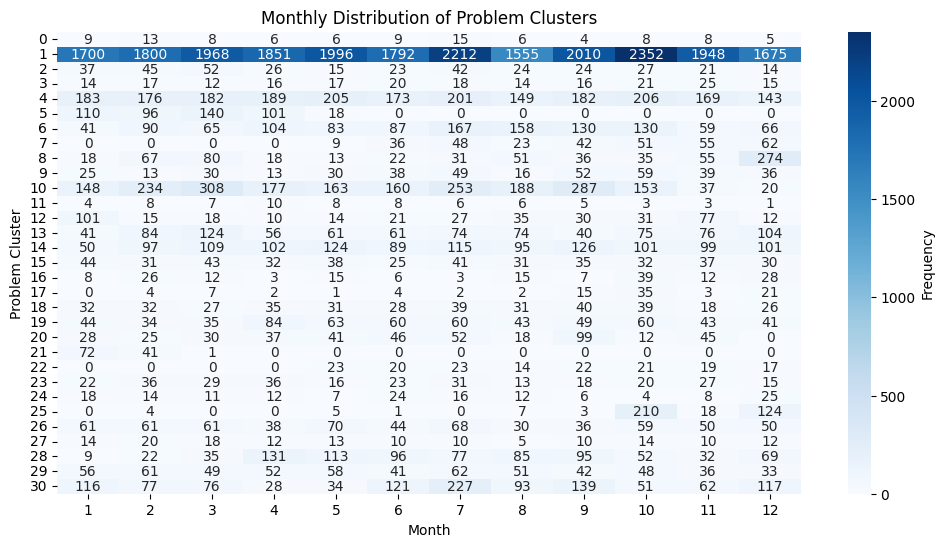

In [17]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from collections import Counter
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Add custom stopwords
custom_stopwords = {"x000d", "please", "investigate", "user", "issue", "not", "to", "in", "on", "is", "and", "we", "the", "a"}
stop_words.update(custom_stopwords)

# Load the dataset
df = pd.read_excel('/content/Incident Data Jan to Dec.xlsx')

# Clean text function
def clean_text(text):
    text = str(text).lower()
    text = ''.join([char for char in text if char.isalnum() or char.isspace()])  # Remove special characters
    words = text.split()
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return ' '.join(words)

# Apply cleaning to the specified columns
df['Short_Description'] = df['Short_Description'].apply(clean_text)
df['Resolution_note'] = df['Resolution_note'].apply(clean_text)

# Extract month from sys_created_on
df['sys_created_on'] = pd.to_datetime(df['sys_created_on'])
df['Month'] = df['sys_created_on'].dt.month

# Vectorize text using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['Short_Description'])

# Cluster similar problems
n_clusters = 31  # Adjust based on your data
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Problem Cluster'] = kmeans.fit_predict(X)

# Analyze month-wise problem distribution
month_problem_data = df.groupby(['Month', 'Problem Cluster']).size().reset_index(name='Count')

# Pivot data for heatmap visualization
# Pivot data for heatmap visualization
heatmap_data = month_problem_data.pivot(index='Problem Cluster', columns='Month', values='Count').fillna(0)
# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='Blues', annot=True, fmt='.0f', cbar_kws={'label': 'Frequency'})
plt.title('Monthly Distribution of Problem Clusters')
plt.xlabel('Month')
plt.ylabel('Problem Cluster')
plt.show()
